In [127]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error ,accuracy_score

### Data Preparation

In [128]:
df = pd.read_csv('BostonHousing.csv')

In [129]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [131]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [132]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [133]:
df.duplicated().sum()

0

In [134]:
df.dropna(axis=1, inplace=True)

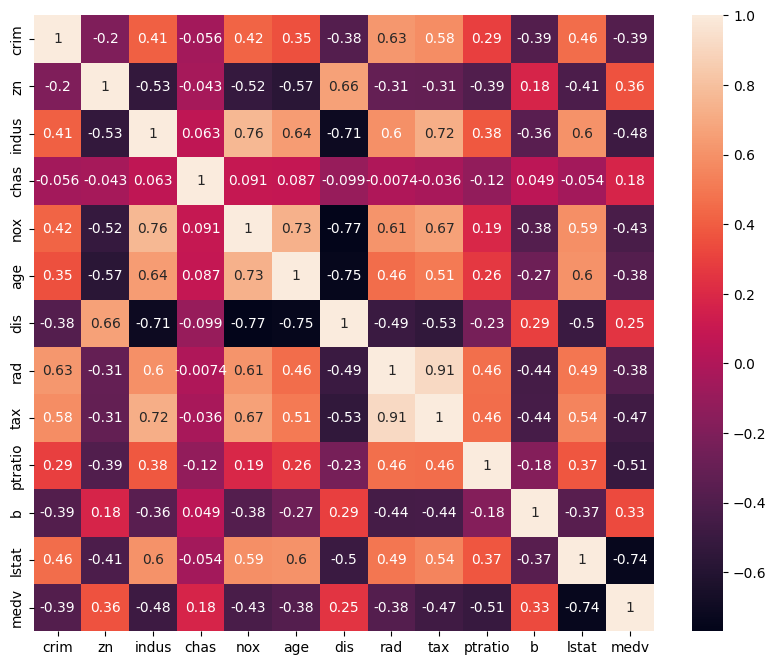

In [135]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

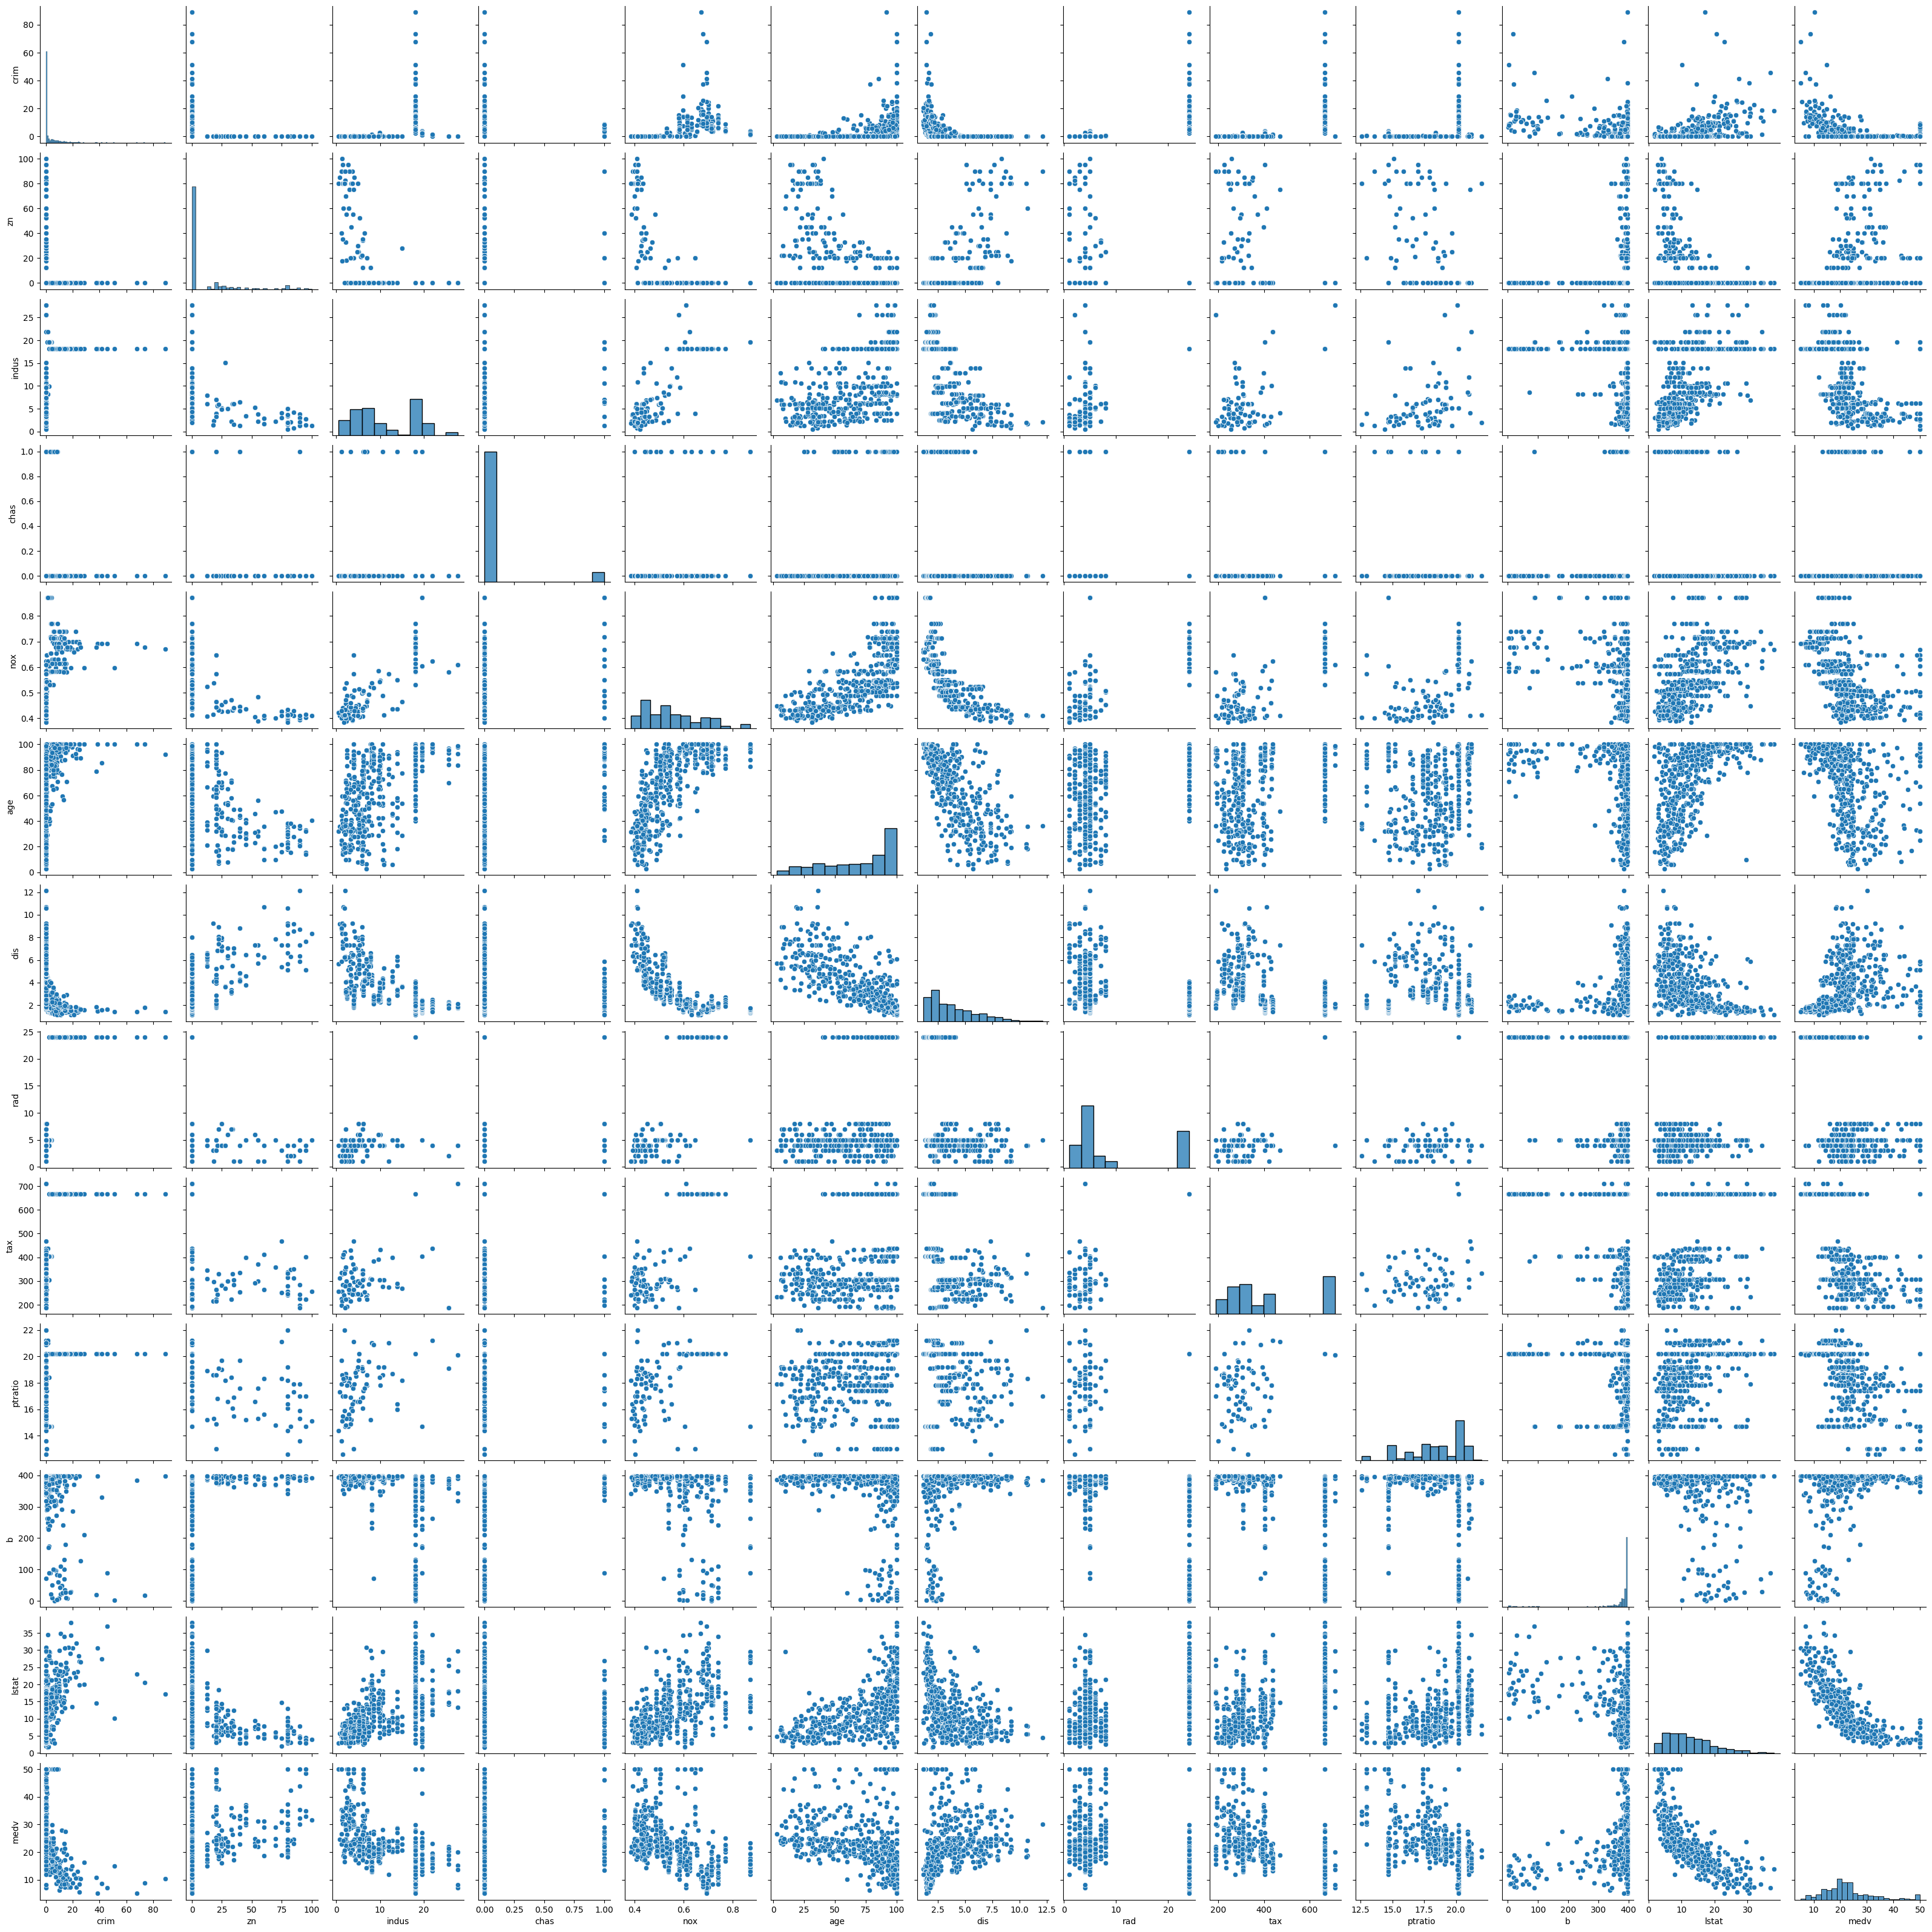

In [136]:
sns.pairplot(df)

### Gradient boost

In [137]:
y = df['medv']
X = df.drop('medv',axis =1)

In [138]:
x_train, x_test ,y_trian , y_test = train_test_split(X, y , test_size=30)

In [139]:
gr = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)

# Train the model
model = gr.fit(x_train, y_trian)

# Make predictions
y_pred = model.predict(x_test)

# Calculate Mean Absolute Error / Mean Squared Error / R-squared
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error :", mae)
print("Mean Squared Error :", mse)
print("R-squared :", r2)

Mean Absolute Error : 4.822851178026013
Mean Squared Error : 57.83132849511065
R-squared : 0.17187972563050957


In [140]:
gr_result = pd.DataFrame(['Gradient Boost - 1', mae, mse , r2]).transpose()
gr_result.columns =['Method', 'Mean Absolute Error',  'Mean Squared Error ', 'R-squared']
gr_result

,Method,Mean Absolute Error,Mean Squared Error,R-squared
0,Gradient Boost - 1,4.822851,57.831328,0.17188


### Importance of variables

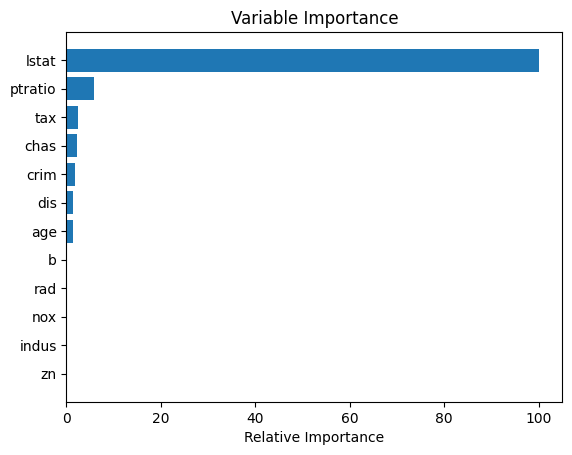

In [141]:
feature_importance = model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [143]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
LR = {'learning_rate':[0.15,0.1,0.10,0.05], 'n_estimators':[100,150,200,250]}

# Initialize GridSearchCV with GradientBoostingRegressor estimator
tuning = GridSearchCV(estimator=GradientBoostingRegressor(), 
                      param_grid=LR, 
                      scoring='r2')

tuning.fit(x_train, y_trian)

# Print the best parameters and best score obtained by GridSearchCV
print("Best parameters:", tuning.best_params_)
print("Best R^2 score:", tuning.best_score_)

Best parameters: {'learning_rate': 0.05, 'n_estimators': 150}
Best R^2 score: 0.7993172278790901


In [144]:
gr2 = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate=0.1)

# Train the model
model2 = gr2.fit(x_train, y_trian)

# Make predictions
y_pred2 = model2.predict(x_test)

# Calculate Mean Absolute Error / Mean Squared Error / R-squared
mae2 = mean_absolute_error(y_test, y_pred)
mse2 = mean_squared_error(y_test, y_pred)
r22 = r2_score(y_test, y_pred)

print("Mean Absolute Error :", mae2)
print("Mean Squared Error :", mse2)
print("R-squared :", r22)

Mean Absolute Error : 4.822851178026013
Mean Squared Error : 57.83132849511065
R-squared : 0.17187972563050957


In [145]:
gr_result2 = pd.DataFrame(['Gradient Boost - 2', mae2, mse2 , r22]).transpose()
gr_result2.columns =['Method', 'Mean Absolute Error',  'Mean Squared Error ', 'R-squared']
gr_result2


,Method,Mean Absolute Error,Mean Squared Error,R-squared
0,Gradient Boost - 2,4.822851,57.831328,0.17188


### Model Comparsion


In [146]:
df_models = pd.concat(
    [gr_result, gr_result2], axis=0 , ignore_index= True
)
df_models

,Method,Mean Absolute Error,Mean Squared Error,R-squared
0,Gradient Boost - 1,4.822851,57.831328,0.17188
1,Gradient Boost - 2,4.822851,57.831328,0.17188
